I have chosen TMDb movie data. This dataset contains information about 5000 movies. Columns like genres,cast,crew are in dictionary format so before starting anything we have to clean them first. 

Here are the four questions I have decided to give answer:

QUES1: How is moving average of 10 years is trending across top three categories?

QUES2: Which factor is maximum positive impact on revenue?

QUES3: Which movie has given maximum hit for each year?

QUES4: Which actor has given maximum hit in each year?

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [177]:
df_movie = pd.read_csv("../input/tmdb_5000_movies.csv")
df_credit = pd.read_csv("../input/tmdb_5000_credits.csv")

In [178]:
# Since genres is given in dictionary format, we have to extract first value from each genres
df_movie.genres = df_movie.genres.str.split(",",n=2,expand=True)[1]
df_movie.genres

0                 "name": "Action"}
1              "name": "Adventure"}
2                 "name": "Action"}
3                 "name": "Action"}
4                 "name": "Action"}
5                "name": "Fantasy"}
6              "name": "Animation"}
7                 "name": "Action"}
8              "name": "Adventure"}
9                 "name": "Action"}
10             "name": "Adventure"}
11             "name": "Adventure"}
12             "name": "Adventure"}
13                "name": "Action"}
14                "name": "Action"}
15             "name": "Adventure"}
16       "name": "Science Fiction"}
17             "name": "Adventure"}
18                "name": "Action"}
19                "name": "Action"}
20                "name": "Action"}
21                "name": "Action"}
22             "name": "Adventure"}
23             "name": "Adventure"}
24             "name": "Adventure"}
25                 "name": "Drama"}
26             "name": "Adventure"}
27              "name": "Thr

In [179]:
# Check for any nulls after splitting it:
df_movie.genres.isnull().sum()

28

In [180]:
df_movie.genres.dropna(inplace=True)

In [181]:
# Confirm all nulls are filled with 0
df_movie.genres.isnull().sum()

0

In [182]:
df_movie['genres'] = df_movie['genres'].apply(lambda x: x.split('"name"')[1])

In [183]:
df_movie['genres']

0                : "Action"}
1             : "Adventure"}
2                : "Action"}
3                : "Action"}
4                : "Action"}
5               : "Fantasy"}
6             : "Animation"}
7                : "Action"}
8             : "Adventure"}
9                : "Action"}
10            : "Adventure"}
11            : "Adventure"}
12            : "Adventure"}
13               : "Action"}
14               : "Action"}
15            : "Adventure"}
16      : "Science Fiction"}
17            : "Adventure"}
18               : "Action"}
19               : "Action"}
20               : "Action"}
21               : "Action"}
22            : "Adventure"}
23            : "Adventure"}
24            : "Adventure"}
25                : "Drama"}
26            : "Adventure"}
27             : "Thriller"}
28               : "Action"}
29               : "Action"}
                ...         
4773            : "Comedy"}]
4774              : "Drama"}
4775              : "Drama"}
4776          

In [184]:
# Remove all special character from genres
df_movie['genres'] =  df_movie['genres'].str.replace('"', '')
df_movie['genres'] =  df_movie['genres'].str.replace(':', '')
df_movie['genres'] =  df_movie['genres'].str.replace(']', '')
df_movie['genres'] =  df_movie['genres'].str.replace('}', '')

In [185]:
# Remove white space from genres
df_movie['genres'] = df_movie['genres'].str.strip()

In [186]:
# Confirm all the values are proper
df_movie['genres']

0                Action
1             Adventure
2                Action
3                Action
4                Action
5               Fantasy
6             Animation
7                Action
8             Adventure
9                Action
10            Adventure
11            Adventure
12            Adventure
13               Action
14               Action
15            Adventure
16      Science Fiction
17            Adventure
18               Action
19               Action
20               Action
21               Action
22            Adventure
23            Adventure
24            Adventure
25                Drama
26            Adventure
27             Thriller
28               Action
29               Action
             ...       
4773             Comedy
4774              Drama
4775              Drama
4776             Comedy
4777              Drama
4778             Action
4779             Comedy
4780           Thriller
4781             Comedy
4782              Drama
4783           T

In [187]:
# Extract year from release date
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])

In [188]:
df_movie['year'] = df_movie['release_date'].dt.year

In [189]:
df_movie.year = df_movie.year.fillna(0).astype(int)

In [190]:
# Confirm that new column year has proper values
df_movie.year

0       2009
1       2007
2       2015
3       2012
4       2012
5       2007
6       2010
7       2015
8       2009
9       2016
10      2006
11      2008
12      2006
13      2013
14      2013
15      2008
16      2012
17      2011
18      2012
19      2014
20      2012
21      2010
22      2013
23      2007
24      2005
25      1997
26      2016
27      2012
28      2015
29      2012
        ... 
4773    1994
4774    1971
4775    2002
4776    1997
4777    2002
4778    2009
4779    1990
4780    2015
4781    2013
4782    2003
4783    2015
4784    2005
4785    2014
4786    2009
4787    2011
4788    1972
4789    2004
4790    2000
4791    2007
4792    1997
4793    2004
4794    2012
4795    1995
4796    2004
4797    2005
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4803, dtype: int64

In [191]:
# Highest top 3 categories 
df_movie.groupby('genres').revenue.sum().nlargest(3)

genres
Action       91883487959
Adventure    71515822443
Drama        54752658561
Name: revenue, dtype: int64

In [192]:
# For category- Action, plot the last 10 years moving average trend
df_action = df_movie.query('genres == "Action"').groupby('year').revenue.sum()
df_action = df_action.rolling(window=10).mean()
df_action 

year
1930             NaN
1936             NaN
1947             NaN
1949             NaN
1950             NaN
1952             NaN
1954             NaN
1962             NaN
1963             NaN
1964    2.786066e+07
1966    2.826066e+07
1967    3.946554e+07
1969    4.006554e+07
1970    3.978554e+07
1971    4.585631e+07
1972    4.322631e+07
1973    4.408358e+07
1975    3.987358e+07
1976    2.398370e+07
1977    2.537570e+07
1978    5.492051e+07
1979    6.764841e+07
1980    8.644272e+07
1981    1.052578e+08
1982    1.219940e+08
1983    1.288357e+08
1984    1.757938e+08
1985    2.170214e+08
1986    2.617862e+08
1987    3.160091e+08
1988    3.234781e+08
1989    3.132950e+08
1990    3.708552e+08
1991    4.097992e+08
1992    4.226208e+08
1993    4.572336e+08
1994    5.559988e+08
1995    7.186971e+08
1996    9.550748e+08
1997    1.157348e+09
1998    1.299032e+09
1999    1.409027e+09
2000    1.537386e+09
2001    1.714052e+09
2002    1.938811e+09
2003    2.145657e+09
2004    2.373527e+09
2005    

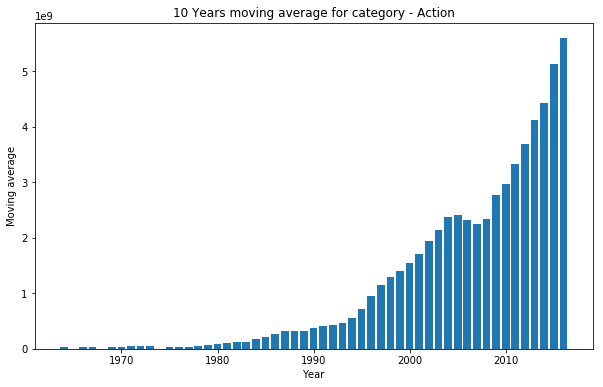

In [193]:
df_action.dropna(inplace=True)
plt.subplots(figsize=(10, 6))
plt.bar(df_action.index, df_action)
plt.title('10 Years moving average for category - Action')
plt.xlabel('Year')
plt.ylabel('Moving average');

In [194]:
# For category- Adventure, plot the last 10 years moving average trend
df_adventure = df_movie.query('genres == "Adventure"').groupby('year').revenue.sum()
df_adventure = df_adventure.rolling(window=10).mean()
df_adventure 

year
1937             NaN
1939             NaN
1940             NaN
1953             NaN
1954             NaN
1956             NaN
1962             NaN
1963             NaN
1964             NaN
1965    5.381435e+07
1969    6.207567e+07
1970    6.060014e+07
1971    7.128490e+07
1972    7.078490e+07
1973    8.414268e+07
1974    9.285988e+07
1975    8.040324e+07
1976    7.730879e+07
1977    1.609044e+08
1978    1.488897e+08
1979    1.656582e+08
1980    2.175983e+08
1981    2.727503e+08
1982    2.806617e+08
1983    3.565039e+08
1984    3.900467e+08
1985    4.465494e+08
1986    4.774598e+08
1987    3.896500e+08
1988    4.153471e+08
1989    4.995996e+08
1990    5.387992e+08
1991    5.411801e+08
1992    5.654418e+08
1993    6.182077e+08
1994    5.958085e+08
1995    6.382118e+08
1996    6.618091e+08
1997    8.018636e+08
1998    8.721421e+08
1999    9.419319e+08
2000    1.034591e+09
2001    1.340988e+09
2002    1.632563e+09
2003    1.907422e+09
2004    2.221484e+09
2005    2.520617e+09
2006    

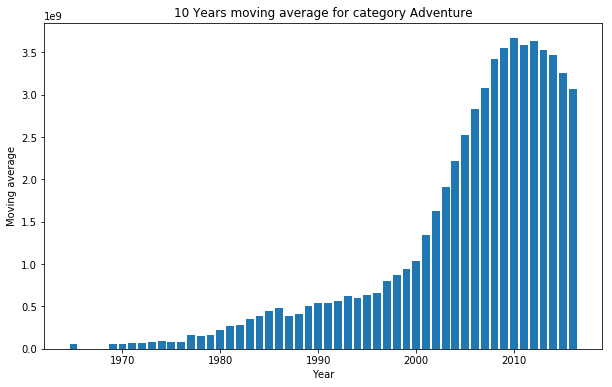

In [195]:
df_adventure .dropna(inplace=True)
plt.subplots(figsize=(10, 6))
plt.bar(df_adventure .index, df_adventure )
plt.title('10 Years moving average for category Adventure')
plt.xlabel('Year')
plt.ylabel('Moving average');

In [196]:
# For category- Drama, plot the last 10 years moving average trend
df_drama = df_movie.query('genres == "Drama"').groupby('year').revenue.sum()
df_drama = df_drama.rolling(window=10).mean()
df_drama

year
1916             NaN
1925             NaN
1927             NaN
1929             NaN
1932             NaN
1936             NaN
1938             NaN
1939             NaN
1940             NaN
1941    4.600797e+07
1942    4.621474e+07
1944    4.455104e+07
1945    4.719920e+07
1946    5.009281e+07
1947    5.087281e+07
1951    5.382281e+07
1953    5.702281e+07
1955    1.700516e+07
1956    1.874516e+07
1957    2.157516e+07
1958    2.228594e+07
1959    2.424964e+07
1960    2.577644e+07
1961    2.502703e+07
1962    2.517203e+07
1963    2.847203e+07
1964    3.349813e+07
1965    7.485273e+07
1966    7.534773e+07
1968    7.573949e+07
            ...     
1987    1.914615e+08
1988    2.323928e+08
1989    2.769976e+08
1990    2.814025e+08
1991    2.996901e+08
1992    3.402436e+08
1993    4.480735e+08
1994    4.598761e+08
1995    5.250560e+08
1996    6.097431e+08
1997    8.555406e+08
1998    9.603783e+08
1999    1.052915e+09
2000    1.209688e+09
2001    1.357863e+09
2002    1.571399e+09
2003    

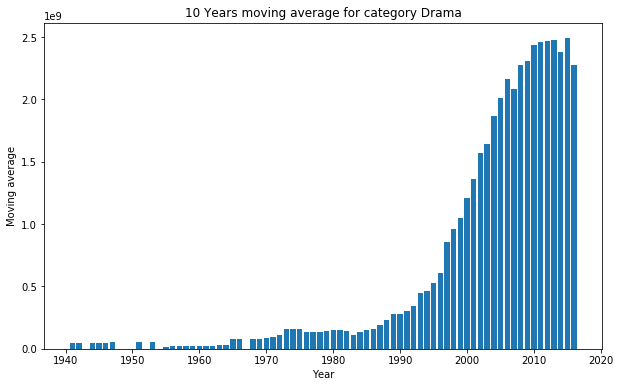

In [197]:
df_drama.dropna(inplace=True)
plt.subplots(figsize=(10, 6))
plt.bar(df_drama.index, df_drama)
plt.title('10 Years moving average for category Drama')
plt.xlabel('Year')
plt.ylabel('Moving average');

QUES1: How is moving average of 10 years is trending across top three categories?

CONCLUSIONS : Action category is most promising and has upward trend, for adventure and drama category we can see that popularity of these two genres are decreasing.

                                  **QUES1 ENDS** 

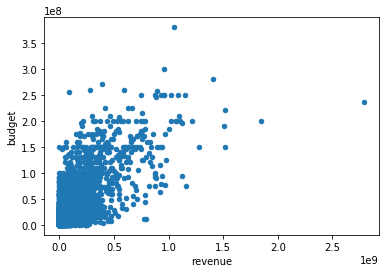

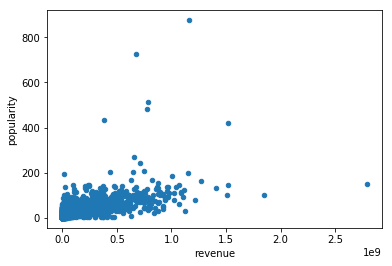

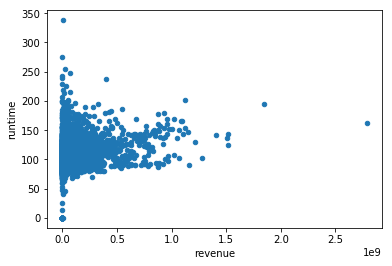

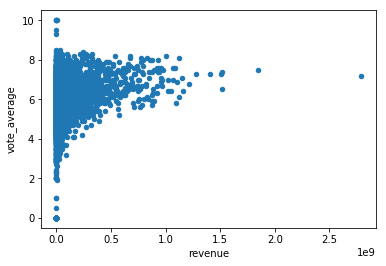

In [198]:
df_movie.plot.scatter(x='revenue',y='budget');
df_movie.plot.scatter(x='revenue',y='popularity');
df_movie.plot.scatter(x='revenue',y='runtime');
df_movie.plot.scatter(x='revenue',y='vote_average');

QUES2: Which factor is maximum positive impact on revenue?

CONCLUSION : After visualizing the scatter plots, we can see that all of the above four factors are not highly positively correleated with revenue. 
                                **QUES2 ENDS** 

In [199]:
# To analyse production companies, we have to first clean the dataset for production comapanies.
df_movie.production_companies = df_movie.production_companies.str.split(":",n=2,expand=True)[1]

In [200]:
df_movie['production_companies'] =df_movie['production_companies'].fillna(0)

In [201]:
df_movie['production_companies'] = df_movie['production_companies'].str.split(",",n=1,expand=True)[0]

In [202]:
df_movie['production_companies'] = df_movie['production_companies'].str.replace('"', '')
df_movie['production_companies'] = df_movie['production_companies'].str.strip()

In [203]:
# Confirm all changes done properly
df_movie['production_companies']

0                    Ingenious Film Partners
1                       Walt Disney Pictures
2                          Columbia Pictures
3                         Legendary Pictures
4                       Walt Disney Pictures
5                          Columbia Pictures
6                       Walt Disney Pictures
7                             Marvel Studios
8                               Warner Bros.
9                                  DC Comics
10                                 DC Comics
11                           Eon Productions
12                      Walt Disney Pictures
13                      Walt Disney Pictures
14                        Legendary Pictures
15                               Walt Disney
16                        Paramount Pictures
17                      Walt Disney Pictures
18                      Amblin Entertainment
19                             WingNut Films
20                         Columbia Pictures
21                     Imagine Entertainment
22        

In [204]:
# creating a subset from larger dataset
df_movie_small = df_movie[['year','production_companies','revenue']] 

In [205]:
# Find out the maximum revnue generating production company from each year
df_new = df_movie_small.ix[df_movie_small.groupby(['year']).revenue.idxmax()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [206]:
df_new

,year,production_companies,revenue
4553,0,NaN,0
4592,1916,Triangle Film Corporation,8394751
4661,1925,Metro-Goldwyn-Mayer (MGM),22000000
2638,1927,Paramount Pictures,650422
4594,1929,Metro-Goldwyn-Mayer (MGM),4358000
3804,1930,The Caddo Company,8000000
3611,1932,Paramount Pictures,25
4570,1933,Warner Bros.,2281000
4604,1934,Columbia Pictures Corporation,4500000
4495,1935,RKO Radio Pictures,3202000


In [207]:
# Count of years in which production company has generated maximum revennue
df_new = df_new.groupby('production_companies').year.count()

In [208]:
# To visualise we have taken where production company has highest grosser more than 1 year
df_new = df_new[df_new > 1]
df_new

production_companies
Columbia Pictures Corporation              3
Lucasfilm                                  7
Metro-Goldwyn-Mayer (MGM)                  5
Paramount Pictures                        14
RKO Radio Pictures                         2
Twentieth Century Fox Film Corporation     7
United Artists                             9
Universal Pictures                         4
Walt Disney Pictures                       6
Walt Disney Productions                    3
Warner Bros.                               3
WingNut Films                              2
Name: year, dtype: int64

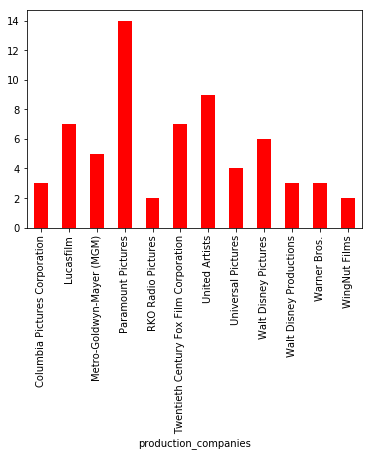

In [209]:
df_new.plot(kind='bar', stacked=True, colormap='autumn')

QUES3: Which movie has given maximum hit for each year?

CONCLUSIONS:Paramount pictures has been 14 times highest revenue earning production comapny of each year followed by United Artist
    
                                  **QUES3 ENDS** 

In [210]:
# Now we look into credits dataset to analyse some pattern
df_credit

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [211]:
# To start with we have to clean the dataset first, in particular cast column
df_credit['cast'] = df_credit['cast'].str.split(":",n=6,expand=True)[6]
df_credit['cast'] = df_credit['cast'].str.split(",",n=0,expand=True)[0]
df_credit['cast']

0             "Sam Worthington"
1                 "Johnny Depp"
2                "Daniel Craig"
3              "Christian Bale"
4               "Taylor Kitsch"
5               "Tobey Maguire"
6                "Zachary Levi"
7           "Robert Downey Jr."
8            "Daniel Radcliffe"
9                 "Ben Affleck"
10              "Brandon Routh"
11               "Daniel Craig"
12                "Johnny Depp"
13                "Johnny Depp"
14               "Henry Cavill"
15                 "Ben Barnes"
16          "Robert Downey Jr."
17                "Johnny Depp"
18                 "Will Smith"
19             "Martin Freeman"
20            "Andrew Garfield"
21              "Russell Crowe"
22             "Martin Freeman"
23       "Dakota Blue Richards"
24                "Naomi Watts"
25               "Kate Winslet"
26                "Chris Evans"
27              "Taylor Kitsch"
28                "Chris Pratt"
29               "Daniel Craig"
                 ...           
4773    

In [212]:
df_credit['cast'] =  df_credit['cast'].str.replace('"', '')
df_credit['cast'] = df_credit['cast'].str.strip()

In [213]:
# Merge both the credit and movie dataset
df_combined = df_credit.merge(df_movie, left_on='movie_id', right_on='id', how='inner')

In [214]:
df_cast = df_combined[['cast','year','revenue']]

In [215]:
df_cast = df_cast.ix[df_cast.groupby(['year']).revenue.idxmax()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [216]:
df_cast

,cast,year,revenue
4553,None,0,0
4592,Lillian Gish,1916,8394751
4661,John Gilbert,1925,22000000
2638,Brigitte Helm,1927,650422
4594,Charles King,1929,4358000
3804,Ben Lyon,1930,8000000
3611,Helen Hayes,1932,25
4570,Warner Baxter,1933,2281000
4604,Clark Gable,1934,4500000
4495,Fred Astaire,1935,3202000


In [217]:
df_cast = df_cast.groupby('cast').year.count()
df_cast  = df_cast [df_cast >1]
df_cast

cast
Betty Hutton        2
Daniel Radcliffe    2
Elijah Wood         2
Harrison Ford       3
John Wayne          2
Johnny Depp         2
Mark Hamill         3
Sean Connery        4
Tom Cruise          2
Tom Hanks           2
Name: year, dtype: int64

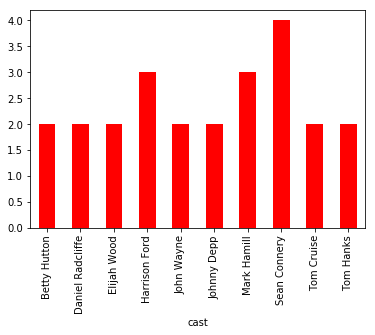

In [218]:
df_cast.plot(kind='bar', stacked=True, colormap='autumn')

Ques4 : Which actor has given maximum hit in each year ?
CONCLUSION : Sean Connery has given maximum hit each year. 